# Perceptron Learning Algorithm

a) Mathematically express the separating decision boundary as $x_2 = ax_1 + b$. What are the slope $a$ and intercept $b$ in terms of $w_0$,$w_1$,$w_2$?
Answer:
$$
\begin{align}
f(x) = w^Tx = w_0 + w_1x_1 + w_2x_2 = 0 \\
w_2x_2 =  -w_1x_1-w_0 \\
x_2 =  -\frac{w_1}{w_2}x_1-\frac{w_0}{w_2}\\
\end{align}
$$
As a result:
$$a = -\frac{w_1}{w_2} \;\;\; b = -\frac{w_0}{w_2}$$

b) Let’s create our own target function $f$ and a linearly separable data set $D$. Consider
$d = 2$ so that you can visualize the problem. First, choose a random line in the plane as your
target function, where one side of the line maps to +1 and the other maps to −1. Choose
the inputs $x_i$ of the data set as random points in the plane, and evaluate the target function
on each $x_i$ to get the corresponding output $y_i$. Generate a dataset of size 20 following this
procedure. Plot the examples ${(x_i,y_i)}$ as well as the target function $f$ on a plane. Please use
different markers for the examples from different classes.

In [102]:
import numpy as np
import matplotlib.pyplot as plt

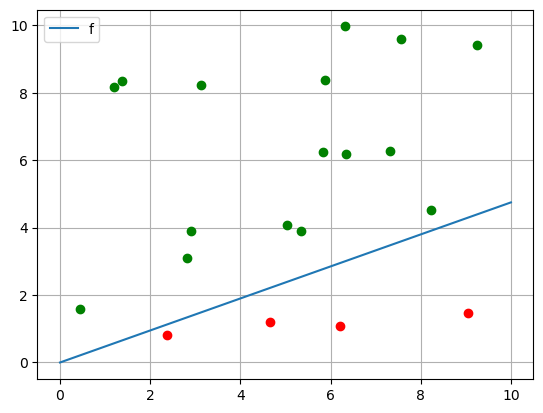

In [103]:
target = np.linspace(0, 10, 100)
random_target = np.random.rand(1,)
plt.plot(target, random_target * target, label='f')
X = np.random.rand(20,2)
label = []
for i in X:
    if random_target*i[0] > i[1]:
        plt.plot(10*i[0], 10*i[1], 'ro')
        label.append(-1)
    else:
        plt.plot(10*i[0], 10*i[1], 'go')
        label.append(1)
plt.legend(loc='upper left')
plt.grid()
plt.show()

c) Implement the perceptron learning algorithm from scracth and run it on the data
set above. Report the number of updates that the algorithm takes before converging. Plot
the examples ${(x_i,y_i)}$, the target function $f$, and the final hypothesis $g$ in the same figure.
Comment on whether $f$ is close to $g$.

In [104]:
def perceptron(input, output):

    w = np.zeros(3)
    y = np.zeros(len(input), dtype=int)
    number_of_updates = 0

    while True:

        number_of_updates += 1

        for index, i in enumerate(input):
            if np.dot(w, i)>=0:
                y[index] = 1
            else:
                y[index] = -1

        missclassified = -1

        for index, i in enumerate(y):
            if i != output[index]:
                missclassified = index
                break
        
        if missclassified < 0:
            break
        
        w = w - y[missclassified]*input[missclassified]
        
    return (w, number_of_updates)
         

In [105]:
data = np.empty(shape= (len(X), 3))
for index, i in enumerate(X):
    data[index] = [1, 10*i[0], 10*i[1]]

result = perceptron(data, label)
weight = result[0]
print("Weight: ", weight, " Number of Updates: ", result[1])

Weight:  [-6.         -1.53208216  7.39582875]  Number of Updates:  11


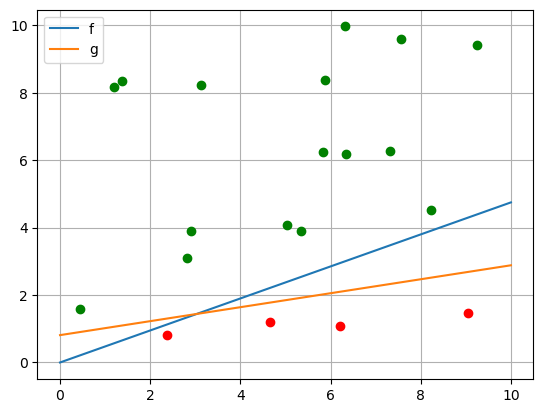

In [106]:
plt.plot(target, random_target*target, label='f')
for i in X:
    if random_target*i[0] > i[1]:
        plt.plot(10*i[0], 10*i[1], 'ro')
    else:
        plt.plot(10*i[0], 10*i[1], 'go')

g = (-weight[1]/weight[2])*target-(weight[0]/weight[2])
plt.plot(target, g, label='g')
plt.legend(loc='upper left')
plt.grid()
plt.show()

As shown in the above plot, target function f is not very close to hypothesis g. The reason behind that is number of data points are too low. So, lack of data points keeps us away estimating the target function exactly. 

d) Repeat everything in (c) with another data set of size 1,000 using the same data generation procedure. Compare your results with (c). Did you observe a difference in convergence?
Discuss your observations and their reasons.

In part d, number of data points are larger than part c. Therefore we can estimate the target function more accurately in part d. As shown in the figure below, the target function f and hypothesis g are really close the each other. Their slopes are also really close. This confirms that estimation is better at part d. In addition to that, we can observe that number of updates for convergence is also higher in part d. Because number of data points lying in the same region is higher.

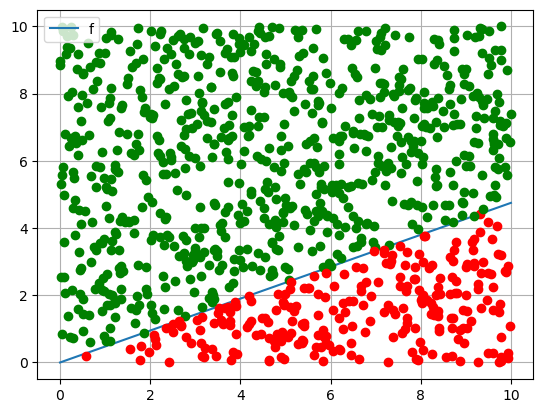

In [107]:
plt.plot(target, random_target * target, label='f')
X = np.random.rand(1000,2)
label = []
for i in X:
    if random_target*i[0] > i[1]:
        plt.plot(10*i[0], 10*i[1], 'ro')
        label.append(-1)
    else:
        plt.plot(10*i[0], 10*i[1], 'go')
        label.append(1)
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [108]:
data = np.empty(shape= (len(X), 3))
for index, i in enumerate(X):
    data[index] = [1, 10*i[0], 10*i[1]]

result = perceptron(data, label)
weight = result[0]
print("Weight: ", weight, " Number of Updates: ", result[1])

Weight:  [  16.         -289.2163112   605.43284277]  Number of Updates:  9559


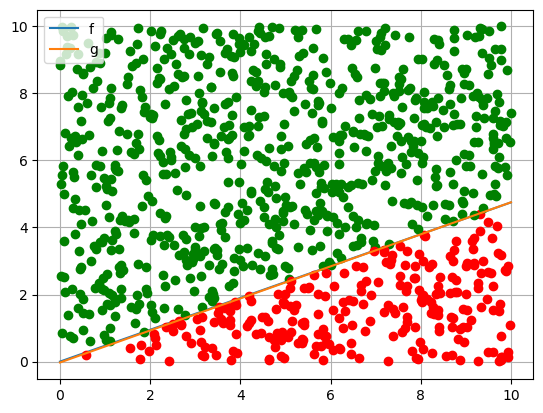

In [109]:
plt.plot(target, random_target*target, label='f')
for i in X:
    if random_target*i[0] > i[1]:
        plt.plot(10*i[0], 10*i[1], 'ro')
    else:
        plt.plot(10*i[0], 10*i[1], 'go')

g = (-weight[1]/weight[2])*target-(weight[0]/weight[2])
plt.plot(target, g, label='g')
plt.legend(loc='upper left')
plt.grid()
plt.show()